In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.neighbors import KNeighborsClassifier

In [201]:
image_folder="E:\Facial_Expression_Dataset"
os.listdir(image_folder)

['Angry', 'Happy', 'Sad', 'Surprise']

In [202]:
angry_image=os.listdir(image_folder)[0]
angry_image

'Angry'

In [203]:
demo_image_path = os.path.join(image_folder, angry_image, os.listdir(os.path.join(image_folder, angry_image))[0])
demo_image_path

'E:\\Facial_Expression_Dataset\\Angry\\00a7cb9cf18d3a015a9e932952f942fd4bcad8044bcef5e0c05de51d~angry.jpg'

In [204]:
angry_image_files=os.listdir(os.path.join(image_folder,angry_image))
angry_image_files

['00a7cb9cf18d3a015a9e932952f942fd4bcad8044bcef5e0c05de51d~angry.jpg',
 '00b7e4551ffa57ff4e2311b2ce156a6c964c642abcacff6920bba177~angry.jpg',
 '0118d3f7d8cbda624679c102f3a09282a7a73018d6fcd1e492a8c5f9~angry.jpg',
 '016e982434c5ffc7ee2fdc353befd030a420183dcb9b323d61458bc9~angry.jpg',
 '01b4484e9f51114bbdaceb1e6b3d00f2708dc04831f051e468200249~angry.jpg',
 '02bc9437f479433dd373fd91f024bea7751f22504f4be12bfd31cf3d~angry.jpg',
 '02f48695d0888b9c0f14dd7bf81d12baac81f4fb6717c3c84421c7be~angry.jpg',
 '03a1406d10206dcb781bb9861b5e483a9f921eab92470374e24b934e~angry.png',
 '03fe5bcebc12a0285ed15485e73e4c27b5c86801d2e0e0ddd9de055b~angry.jpg',
 '04a6eb972d5563355cf88dbaa860bfd00a12b0030f30c45299bc37e0~angry.jpg',
 '04fd1a0dce5cf5463f214f30b4d468571e662a86bcc90473ca37aa20~angry.jpg',
 '0685e4ed1432f27421d21cd4e9331c40a4e98df4497f32402fe202f6~angry.JPG',
 '0691a1b2326a0830be0f62fff80236f06027689d138fa0f1ca86764f~angry.jpg',
 '06ab16c62fdcb2c8b8181f5c3f0a18749eb4fd0e71c36c9a9bae3210~angry.jpg',
 '07df

Processing image : E:\Facial_Expression_Dataset\Angry\00a7cb9cf18d3a015a9e932952f942fd4bcad8044bcef5e0c05de51d~angry.jpg 
(255, 255, 3)


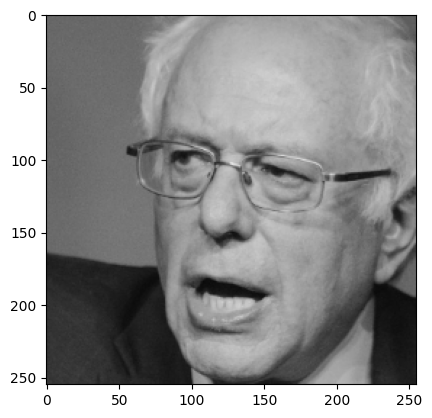

In [ ]:
def preprocess_image(image_path):
    # print(f"Processing image : {image_path} ")
    demo_image=cv2.imread(demo_image_path)
    demo_image=cv2.cvtColor(demo_image, cv2.COLOR_BGR2GRAY)
    demo_image=cv2.resize(demo_image,(255,255))
    demo_image=cv2.cvtColor(demo_image,cv2.COLOR_BGR2RGB) # by default openCV uses BGR color, not RGB, we need to convert it
    demo_image=demo_image / 255.0
    return demo_image
demo_image=preprocess_image(demo_image_path)
print(demo_image.shape)
plt.imshow(demo_image)

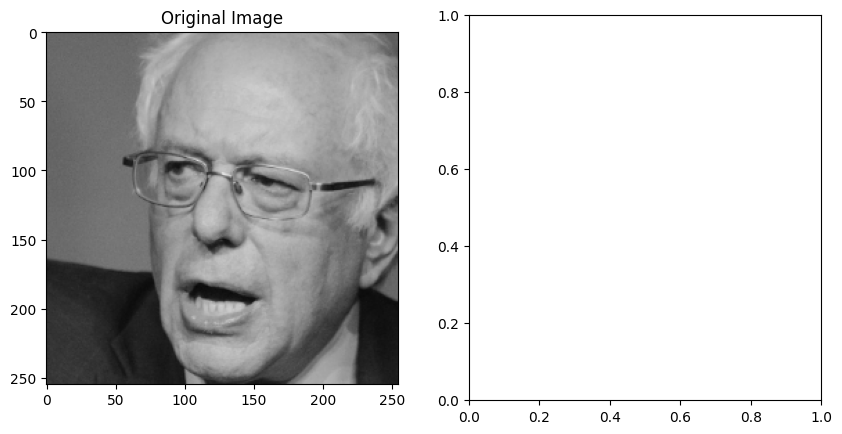

In [206]:
from skimage.feature import hog
from skimage.color import rgb2gray

def extract_hog_features(image): 
    image = rgb2gray(image)
    features = hog(image, pixels_per_cell=(2, 2), 
                              cells_per_block=(2, 2),orientations=8)#visualize can be either True or False
    return features
hog_features = extract_hog_features(demo_image)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(demo_image, cmap="gray")
ax[0].set_title("Original Image")
# ax[1].imshow(hog_image, cmap="gray")
# ax[1].set_title("HOG Features")
plt.show()


In [207]:
catagories=os.listdir(image_folder)
catagories

['Angry', 'Happy', 'Sad', 'Surprise']

In [208]:
catagories=catagories[:2]

In [209]:
M=[]
Y=[]

In [210]:
for catagory in catagories:
    folder_path=os.path.join(image_folder,catagory)
    image_files=os.listdir(folder_path)
    print(f"Processing images of {catagory} Folder")
    print(f"Total files found: {len(image_files)}")    
    print(f"Current Y value: {catagory}")    

    for file in image_files:
        image=preprocess_image(file)
        feature_map=extract_hog_features(image)
        M.append(feature_map)
        Y.append(catagory)

Processing images of Angry Folder
Total files found: 1313
Current Y value: Angry
Processing image : 00a7cb9cf18d3a015a9e932952f942fd4bcad8044bcef5e0c05de51d~angry.jpg 
Processing image : 00b7e4551ffa57ff4e2311b2ce156a6c964c642abcacff6920bba177~angry.jpg 
Processing image : 0118d3f7d8cbda624679c102f3a09282a7a73018d6fcd1e492a8c5f9~angry.jpg 
Processing image : 016e982434c5ffc7ee2fdc353befd030a420183dcb9b323d61458bc9~angry.jpg 
Processing image : 01b4484e9f51114bbdaceb1e6b3d00f2708dc04831f051e468200249~angry.jpg 
Processing image : 02bc9437f479433dd373fd91f024bea7751f22504f4be12bfd31cf3d~angry.jpg 
Processing image : 02f48695d0888b9c0f14dd7bf81d12baac81f4fb6717c3c84421c7be~angry.jpg 
Processing image : 03a1406d10206dcb781bb9861b5e483a9f921eab92470374e24b934e~angry.png 
Processing image : 03fe5bcebc12a0285ed15485e73e4c27b5c86801d2e0e0ddd9de055b~angry.jpg 
Processing image : 04a6eb972d5563355cf88dbaa860bfd00a12b0030f30c45299bc37e0~angry.jpg 
Processing image : 04fd1a0dce5cf5463f214f30b4d468

In [220]:
from sklearn.preprocessing import LabelEncoder
#convert into numpy array
X1 = np.array(M)  # Extract only the feature vectors, not the hog image
# np.save("M.npy",np.array(M,dtype=np.float32))
Y = np.array(Y)

label_encoder = LabelEncoder()

Y = label_encoder.fit_transform(Y)

# print("Data Shape:", M.shape)
print("Y values:",np.unique(Y))

MemoryError: Unable to allocate 19.1 GiB for an array with shape (5053, 508032) and data type float64

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
# X=pca.fit_transform(X1)

In [ ]:
X[0].shape

(10,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.15, random_state=42)

print(f"Training samples: {len(y_train)}")
print(f"Testing samples: {len(y_test)}")


Training samples: 487
Testing samples: 86


In [ ]:
# Train an SVM classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 50.00%


In [ ]:
# Train an SVM classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)

# Predict on test set
svm_pred = svm.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, svm_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 50.00%


In [ ]:
def predict_image(image_path):
    image=preprocess_image(image_path)
    features=extract_hog_features(image)
    features=np.array(features).reshape(1, -1)
    features=pca.transform(features)
    knn_predict=knn.predict(features)
    svm_predict=svm.predict(features)
    return knn_predict,svm_predict


image="E:\Facial_Expression_Dataset - Copy\Angry\\angry (8).jpg"
knn_predict,svm_predict=predict_image(image)


Processing image : E:\Facial_Expression_Dataset - Copy\Angry\angry (8).jpg 


In [ ]:
print("Predicted KNN result: ",label_encoder.inverse_transform(knn_predict))
print("Predicted SVM result: ",label_encoder.inverse_transform(svm_predict))

Predicted KNN result:  ['Happy']
Predicted SVM result:  ['Happy']
